# Show Me Music

In [1]:
!pip install spotipy # Install if spotipy doesn't exist
!pip install umap-learn -i https://mirrors.ustc.edu.cn/pypi/web/simple # Install if umap doesn't exist
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 9.2 MB/s 
     |████████████████████████████████| 62 kB 296 kB/s 
     |████████████████████████████████| 236 kB 40.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 137 kB/s 
     |████████████████████████████████| 1.1 MB 433 kB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8623e8d90bdf0da900a749e66f85f70acf37d52fddcf81c48413c4e8df7ae551
  Stored in direct

# Set Up Your Spotify Account
## In order to run this notebook you need the **client_id** and **client_secret** for your application.
To use the Spotfiy API, start by creating a Spotify user account (Premium or Free). To do that, simply sign up at www.spotify.com.

When you have a user account, go to the Dashboard page at the Spotify Developer website and, if necessary, log in. Accept the latest Developer Terms of Service to complete your account set up.

# Register Your Application
You need to create and register a new application to generate valid credentials. You’ll need these credentials later to perform API calls. You can follow the App settings guide at https://developer.spotify.com/documentation/general/guides/authorization/app-settings to learn how to generate them.

In [ ]:
#@title Enter Spotify Credentials
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import seaborn as sns
import spotipy
import sys
import umap
client_id = "" #@param {type:"string"}
client_secret = "" #@param {type:"string"}
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret)) # Get spotify app credentials

## Get Track Features

In [ ]:
#@title Enter Track "\<track_name> \<artist_name>" ex: Diamonds Sam Smith
track = "Diamonds Sam Smith" #@param {type:"string"} 
# Enter in quotes "<track_name> <artist_name>" ex: Diamonds Sam Smith
result = sp.search(q = track, limit=1)['tracks']['items'][0]
track_name = result['name']
tid = result['uri']
print(track_name, "-", tid) # Verify track_id from spotify web app url if not sure

Diamonds - spotify:track:5hvwx5i67IwnCkjl9VHkNv


In [ ]:
track_features = sp.audio_features(tid)
track_features_df = pd.DataFrame({'acousticness': track_features[0]['acousticness'], 'danceability': track_features[0]['danceability'], 'energy': track_features[0]['energy'], 'loudness': track_features[0]['loudness'], 'tempo': track_features[0]['tempo'], 'valence': track_features[0]['valence']}, index = [1])
track_features_df

,acousticness,danceability,energy,loudness,tempo,valence
1,0.154,0.653,0.667,-6.764,104.181,0.556


# Get Playlist id of your favourite playlist
Ex:1R5gC67hzygasAOx2O9Ojx (from https://open.spotify.com/playlist/1R5gC67hzygasAOx2O9Ojx)

In [ ]:
#@title Enter Spotify Playlist Id from url
playlist_id = "1R5gC67hzygasAOx2O9Ojx" #@param {type:"string"}
pl_id = 'spotify:playlist:'+playlist_id # Get playlist id from spotify url
offset = 0
response = sp.playlist_items(pl_id,
                                 offset=offset,
                                 fields='items.track.id,total',
                                 additional_types=['track'])
tids = []
for item in response['items']:
    tids.append(item['track']['id'])

acousticness = []
danceability = []
energy = []
loudness = []
tempo = []
valence = []
pl_track_features = sp.audio_features(tids)
for track in pl_track_features:
    acousticness.append(track['acousticness'])
    danceability.append(track['danceability'])
    energy.append(track['energy'])
    loudness.append(track['loudness'])
    tempo.append(track['tempo'])
    valence.append(track['valence'])

features_df = pd.DataFrame({'acousticness': acousticness, 'danceability': danceability, 'energy': energy, 'loudness': loudness, 'tempo': tempo, 'valence': valence}) #'tid': tids,

loudness_max = 0
loudness_min = -60
features_df['loudness'] = (features_df['loudness'] - loudness_min) / (loudness_max - loudness_min)
# tempo_max = 180
tempo_max = features_df['tempo'].max()
# temp_min = 0
tempo_min = features_df['tempo'].min()
features_df['tempo'] = (features_df['tempo'] - tempo_min) / (tempo_max - tempo_min)


In [ ]:
print(features_df.shape)
features_df

(98, 6)


,acousticness,danceability,energy,loudness,tempo,valence
0,0.42500,0.748,0.679,0.931717,0.872552,0.782
1,0.20000,0.907,0.610,0.922417,0.230480,0.686
2,0.25900,0.608,0.757,0.884250,0.471626,0.625
3,0.20000,0.439,0.672,0.942083,0.838910,0.498
4,0.62500,0.540,0.909,0.897233,0.477007,0.189
...,...,...,...,...,...,...
93,0.34200,0.751,0.669,0.891133,0.430956,0.359
94,0.20700,0.742,0.404,0.947783,0.584055,0.789
95,0.00431,0.773,0.625,0.925783,0.519211,0.673
96,0.13000,0.725,0.543,0.859700,0.197897,0.307


In [ ]:
track_features_df['loudness'] = (track_features_df['loudness'] - loudness_min) / (loudness_max - loudness_min)
track_features_df['tempo'] = (track_features_df['tempo'] - tempo_min) / (tempo_max - tempo_min)
track_features_df.shape
track_features_df

,acousticness,danceability,energy,loudness,tempo,valence
1,0.154,0.653,0.667,0.887267,0.311828,0.556


## Identifying optimal clusters for grouping playlist tracks

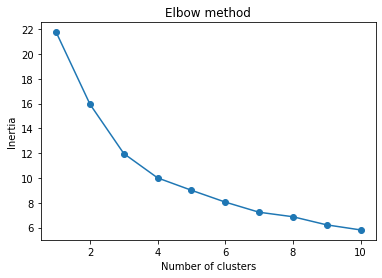

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), inertias, curve="convex", direction="decreasing")
k = kl.elbow
print("The selected playlist can be organized into ",k, " groups.")

The selected playlist can be organized into  4  groups.


In [ ]:
model = KMeans(n_clusters=k, random_state=999).fit(features_df)
labeled_features_df = features_df.assign(label = model.labels_)
labeled_features_df

,acousticness,danceability,energy,loudness,tempo,valence,label
0,0.42500,0.748,0.679,0.931717,0.872552,0.782,1
1,0.20000,0.907,0.610,0.922417,0.230480,0.686,2
2,0.25900,0.608,0.757,0.884250,0.471626,0.625,2
3,0.20000,0.439,0.672,0.942083,0.838910,0.498,1
4,0.62500,0.540,0.909,0.897233,0.477007,0.189,3
...,...,...,...,...,...,...,...
93,0.34200,0.751,0.669,0.891133,0.430956,0.359,0
94,0.20700,0.742,0.404,0.947783,0.584055,0.789,1
95,0.00431,0.773,0.625,0.925783,0.519211,0.673,1
96,0.13000,0.725,0.543,0.859700,0.197897,0.307,0


## Visualizing the Playlist

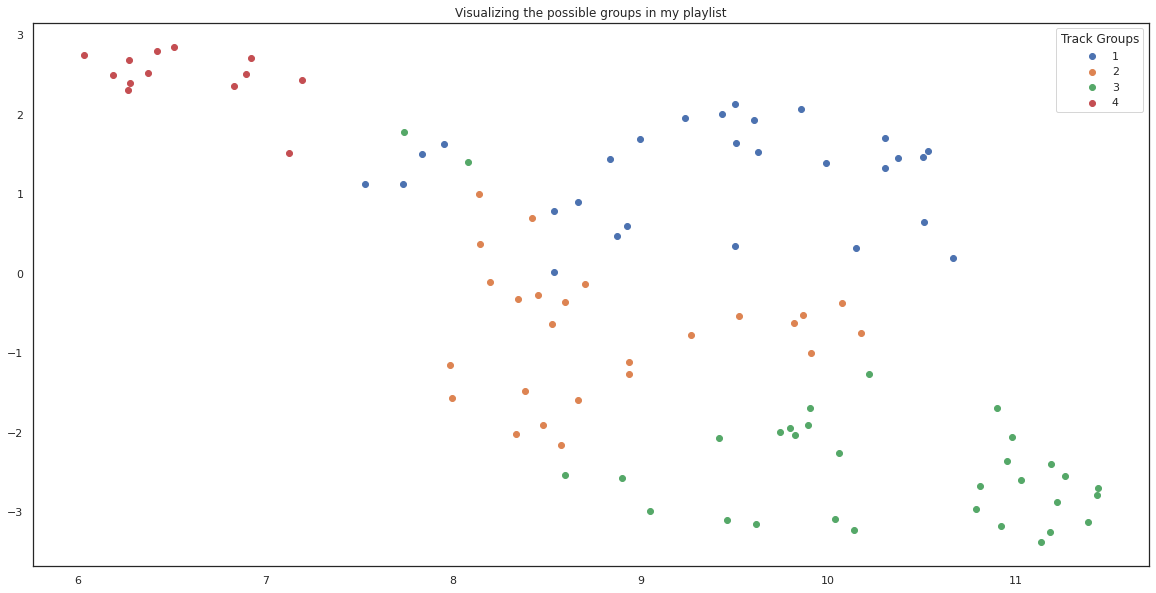

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(features_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(20,10)})

fig, ax = plt.subplots(1,1)
for l in np.unique(model.labels_):
    ix = np.where(model.labels_ == l)
    ax.scatter(
        embedding[:, 0][ix],
        embedding[:, 1][ix],
        label = l+1
    )
ax.legend()
plt.legend(loc = "upper right", title = "Track Groups")
plt.title("Visualizing the possible groups in my playlist")
plt.show()

## Visualizing features of each identified track group

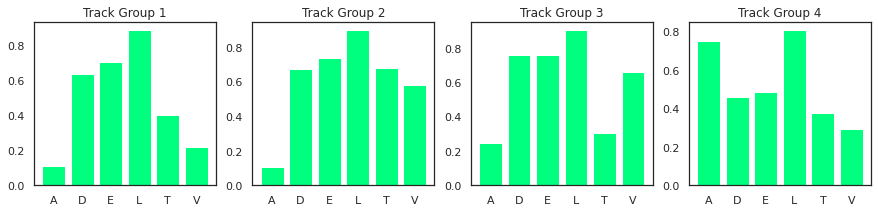

In [ ]:
plt.subplots(nrows = 1, ncols = k, figsize=(15, 3))
for l in np.unique(model.labels_):
    plt.subplot(1, k, l+1).set_title("Track Group " + str(l+1))
    plt.bar(['A', 'D', 'E', 'L', 'T', 'V'], labeled_features_df.query('label == @l').mean().values[:-1], color = 'springgreen')
plt.show()

## Predicting the group for the selected track

In [ ]:
predicted_Label = model.predict(track_features_df)[0]
print("The song is similar to group: ", predicted_Label+1)

The song is similar to group:  3


# Predicted Group vs Track - How do they compare?

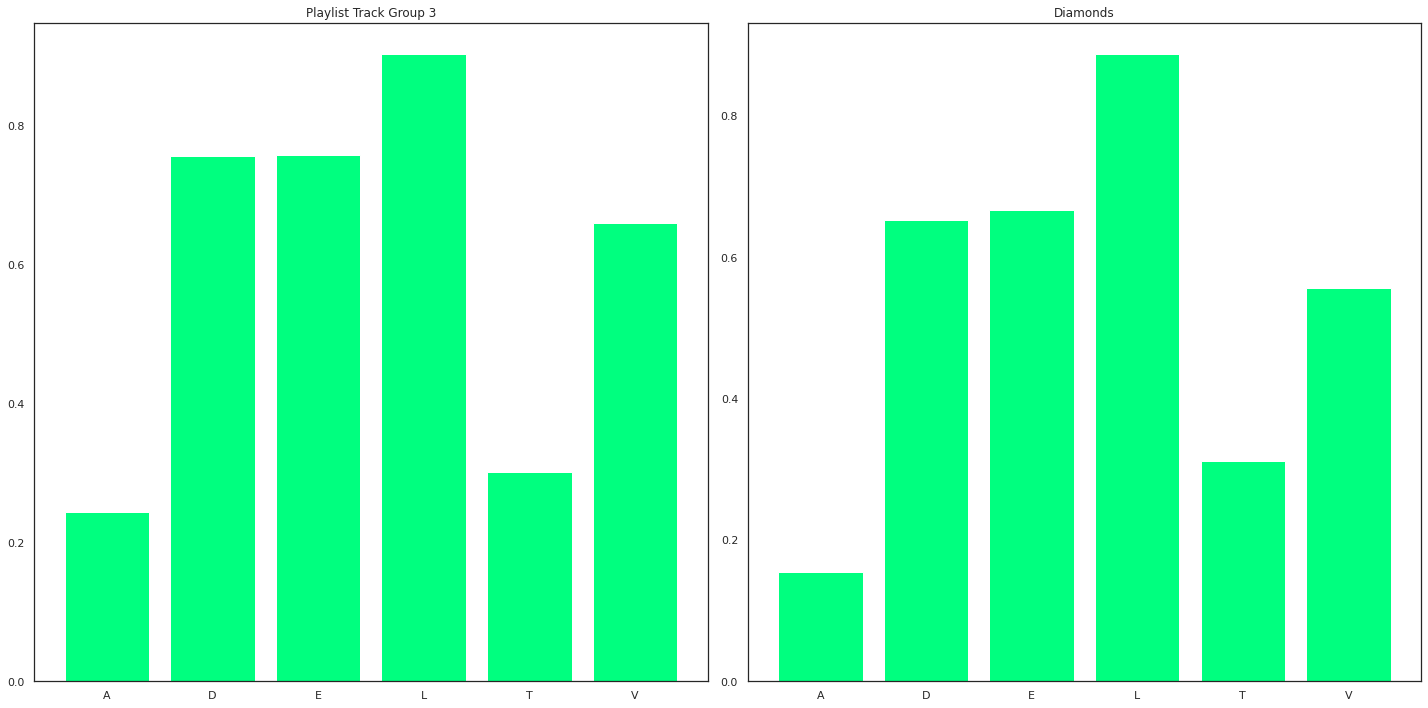

In [ ]:
plt.subplot(1, 2, 1).set_title("Playlist Track Group " + str(predicted_Label + 1))
plt.bar(['A', 'D', 'E', 'L', 'T', 'V'], labeled_features_df.query('label == @predicted_Label').mean().values[:-1], color = 'springgreen')
plt.subplot(1, 2, 2).set_title(track_name)
plt.bar(['A', 'D', 'E', 'L', 'T', 'V'], track_features_df.values[0], color = 'springgreen')
plt.tight_layout()
plt.show()